# Klasyfikator Masza vs Rysia

### import tf

In [1]:
import tensorflow as tf

is gpu avaiable test

In [2]:
gpu_available = tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


2022-08-16 23:36:07.618406: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-08-16 23:36:07.650007: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-08-16 23:36:07.686500: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-08-16 23:36:07.686957: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built witho

In [3]:
gpu_available

True

other way

In [4]:
tf.config.list_physical_devices('GPU')

2022-08-16 23:36:08.295461: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-08-16 23:36:08.296185: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-08-16 23:36:08.296575: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

### import dependencies

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [6]:
import pathlib

In [7]:
data_dir = "./koty/"
data_dir = pathlib.Path(data_dir)

In [8]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

80


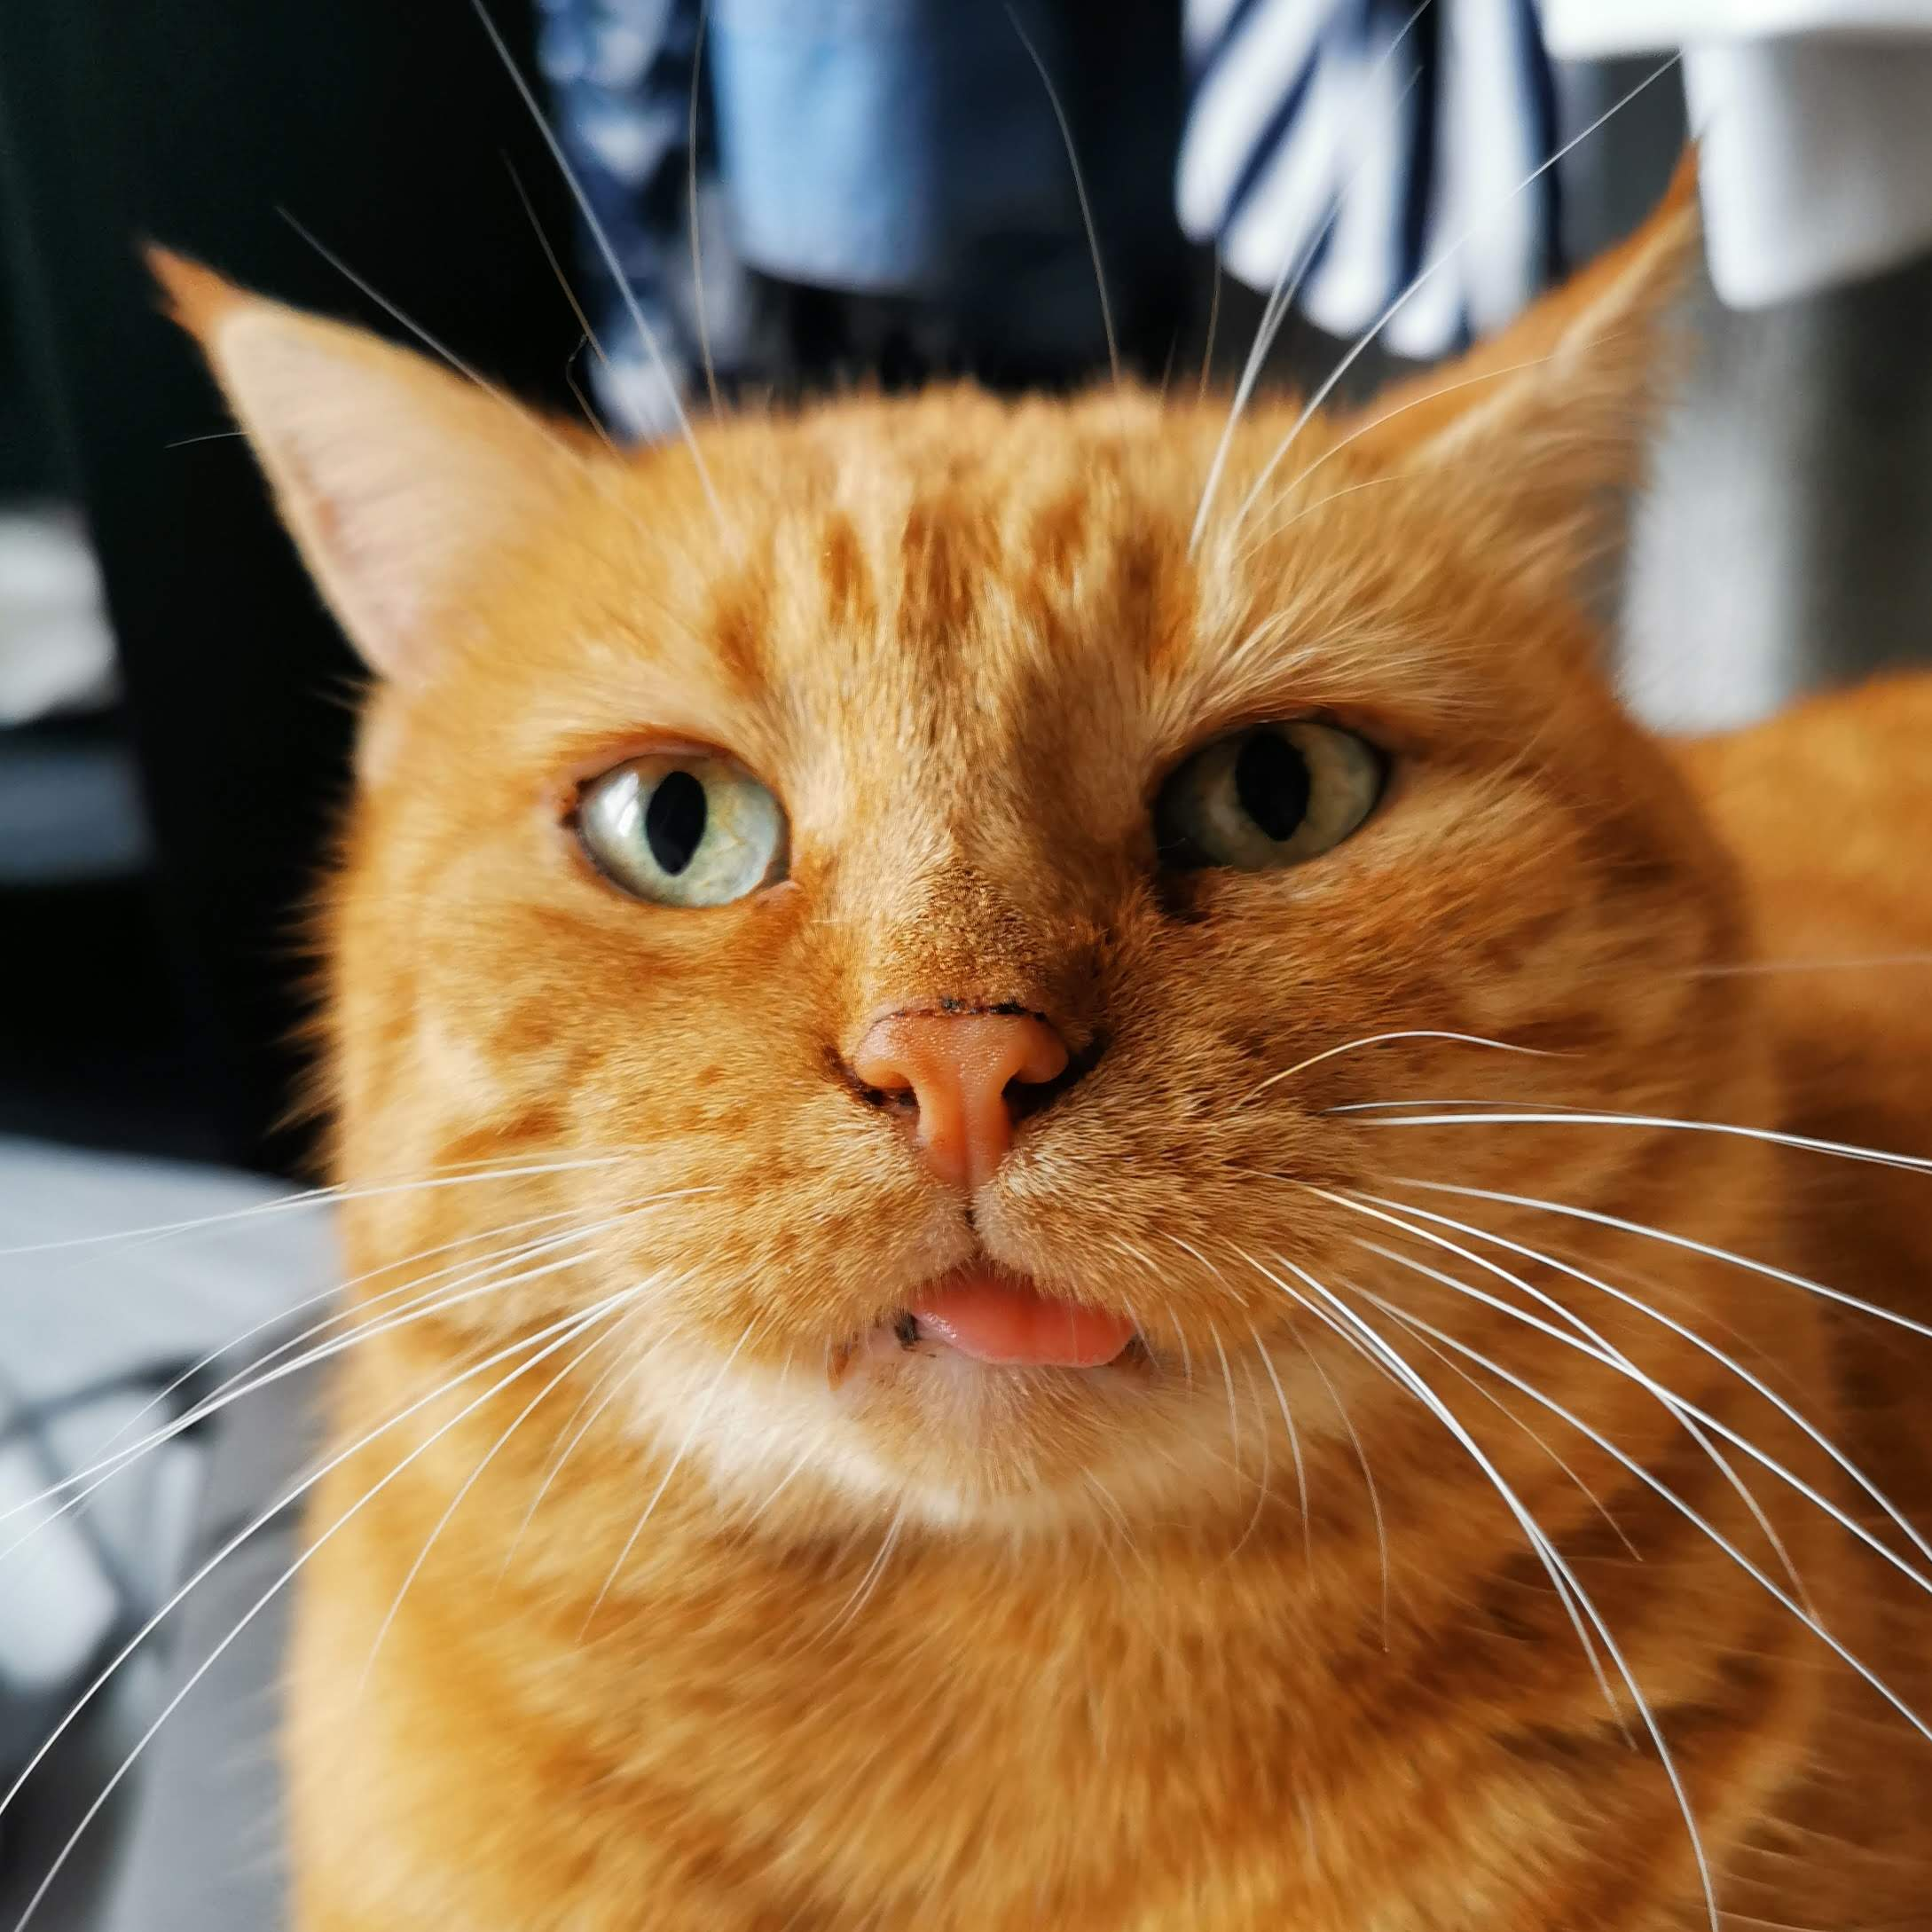

In [9]:
masza = list(data_dir.glob('masza/*'))
PIL.Image.open(str(masza[0]))

In [10]:
batch_size = 32
img_height = 180
img_width = 180

In [11]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 80 files belonging to 2 classes.
Using 64 files for training.


2022-08-16 23:36:09.752190: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-08-16 23:36:09.752607: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-08-16 23:36:09.752966: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-08-16 23:36:09.753589: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-08-16 23:36:09.753603: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Could not ident

In [12]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 80 files belonging to 2 classes.
Using 16 files for validation.


In [13]:
class_names = train_ds.class_names
print(class_names)

['masza', 'rysia']


In [14]:
TF_CPP_MIN_LOG_LEVEL=2

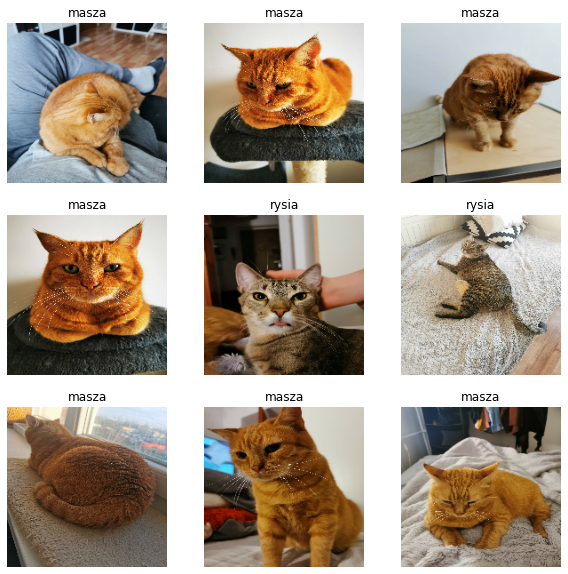

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [16]:
AUTOTUNE = tf.data.AUTOTUNE

In [17]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)

In [18]:
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [19]:
normalization_layer = layers.Rescaling(1./255)

In [20]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))

In [21]:
image_batch, labels_batch = next(iter(normalized_ds))


In [22]:
first_image = image_batch[0]

In [23]:
print(np.min(first_image), np.max(first_image))


0.0 0.9333334


In [24]:
num_classes = len(class_names)

In [25]:
model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [26]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [28]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10


2022-08-16 23:36:12.989505: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8500
2022-08-16 23:36:13.526157: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-08-16 23:36:13.654009: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


2/2 [==============================] - 3s 421ms/step - loss: 0.9464 - accuracy: 0.5469 - val_loss: 0.8770 - val_accuracy: 0.6250
Epoch 2/10
2/2 [==============================] - 0s 49ms/step - loss: 0.9995 - accuracy: 0.4531 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/10
2/2 [==============================] - 0s 50ms/step - loss: 0.6385 - accuracy: 0.6562 - val_loss: 0.8733 - val_accuracy: 0.3750
Epoch 4/10
2/2 [==============================] - 0s 45ms/step - loss: 0.5981 - accuracy: 0.5469 - val_loss: 0.6499 - val_accuracy: 0.8125
Epoch 5/10
2/2 [==============================] - 0s 40ms/step - loss: 0.4733 - accuracy: 0.9375 - val_loss: 0.5796 - val_accuracy: 0.8125
Epoch 6/10
2/2 [==============================] - 0s 46ms/step - loss: 0.3638 - accuracy: 0.8906 - val_loss: 0.5783 - val_accuracy: 0.8125
Epoch 7/10
2/2 [==============================] - 0s 47ms/step - loss: 0.2248 - accuracy: 1.0000 - val_loss: 0.4575 - val_accuracy: 0.8125
Epoch 8/10
2/2 [=====================

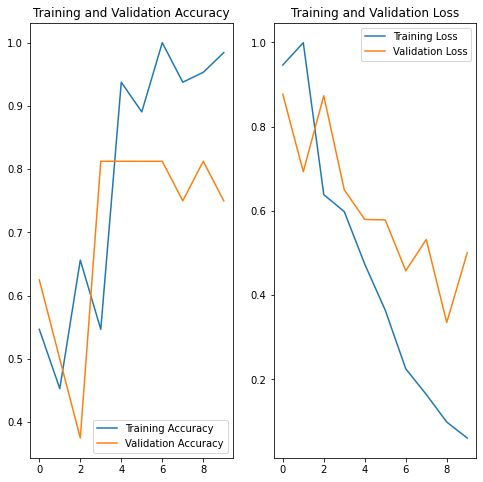

In [29]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [30]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

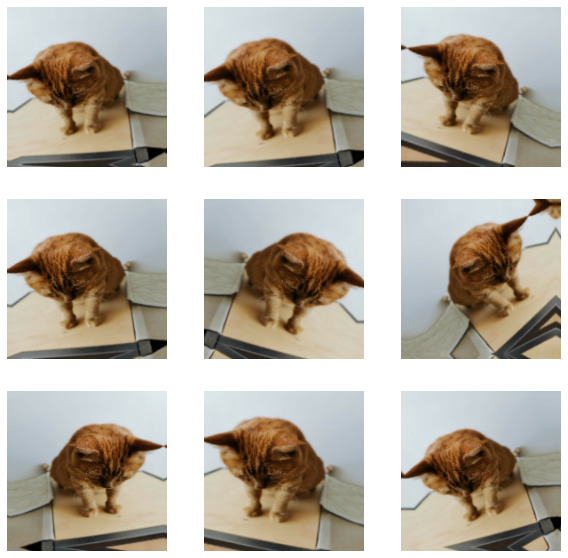

In [31]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [32]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [33]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [34]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                  

In [35]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
2/2 [==============================] - 1s 210ms/step - loss: 1.8964 - accuracy: 0.5312 - val_loss: 1.0738 - val_accuracy: 0.6250
Epoch 2/15
2/2 [==============================] - 0s 97ms/step - loss: 1.1708 - accuracy: 0.4531 - val_loss: 0.6960 - val_accuracy: 0.3750
Epoch 3/15
2/2 [==============================] - 0s 95ms/step - loss: 0.6672 - accuracy: 0.5938 - val_loss: 0.8250 - val_accuracy: 0.3750
Epoch 4/15
2/2 [==============================] - 0s 74ms/step - loss: 0.6715 - accuracy: 0.5469 - val_loss: 0.7719 - val_accuracy: 0.3750
Epoch 5/15
2/2 [==============================] - 0s 69ms/step - loss: 0.6021 - accuracy: 0.6250 - val_loss: 0.7395 - val_accuracy: 0.4375
Epoch 6/15
2/2 [==============================] - 0s 67ms/step - loss: 0.5374 - accuracy: 0.7031 - val_loss: 0.7149 - val_accuracy: 0.6250
Epoch 7/15
2/2 [==============================] - 0s 69ms/step - loss: 0.4546 - accuracy: 0.8594 - val_loss: 0.7257 - val_accuracy: 0.6250
Epoch 8/15
2/2 [==========

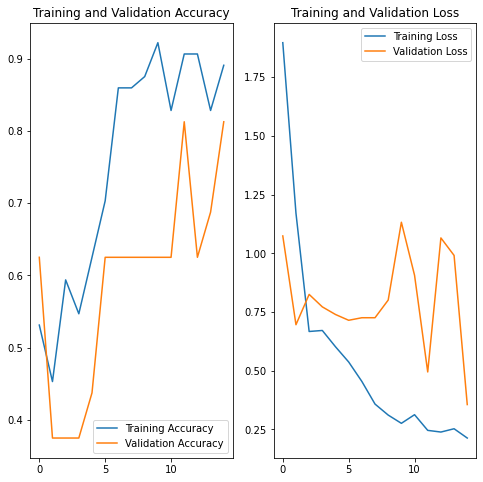

In [36]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [37]:
koty_nowe = pathlib.Path("./koty_nowe/")
masza_nowe = list(koty_nowe.glob('masza*'))
rysia_nowe = list(koty_nowe.glob('rysia*'))
print(rysia_nowe, masza_nowe)

[PosixPath('koty_nowe/rysia2.jpg'), PosixPath('koty_nowe/rysia1.jpg')] [PosixPath('koty_nowe/masza2.jpg'), PosixPath('koty_nowe/masza1.jpg')]


In [38]:
rysia_nowe[0]

PosixPath('koty_nowe/rysia2.jpg')

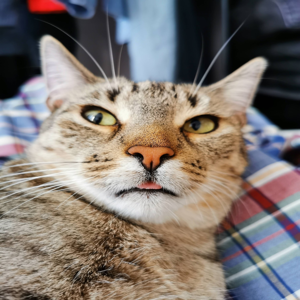

In [48]:
newsize = (300, 300)
PIL.Image.open(str(rysia_nowe[0])).resize(newsize)

In [46]:
img = tf.keras.utils.load_img(
    str(rysia_nowe[0]), target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

1/1 [==============================] - 0s 15ms/step


In [47]:
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to rysia with a 91.22 percent confidence.
